In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [2]:
xls = pd.ExcelFile('data/need_aggregated.xlsx')


In [3]:
# England & Wales
eng_bedrooms = pd.read_excel(xls, 'Bedrooms')
eng_adults = pd.read_excel(xls, 'Adults')
eng_income = pd.read_excel(xls, 'Income')
eng_region = pd.read_excel(xls, 'Region')
eng_tenure = pd.read_excel(xls, 'Tenure')


## Scotland
scot_bedrooms = pd.read_excel(xls, 'Scotland_Bedrooms')
scot_adults = pd.read_excel(xls, 'Scotland_Adults')
scot_income = pd.read_excel(xls, 'Scotland_Income')
scot_tenure = pd.read_excel(xls, 'Scotland_Tenure')

In [4]:
eng_bedrooms.head()

,year,num_bedrooms,elec_sample_size,elec_mean_consumption,elec_median_consumption,gas_sample_size,gas_mean_consumption,gas_median_consumption
0,2005,1,278770,3400,2300.0,161490,10300,9400
1,2006,1,315710,3300,2200.0,167360,9700,8800
2,2007,1,317910,3300,2200.0,171300,9400,8500
3,2008,1,320440,3200,2100.0,173020,9000,8000
4,2009,1,322050,3200,2100.0,198170,8100,7200


In [5]:
def no_data(dataframe, cols):
    dataframe[cols] = np.where(dataframe[cols].isin(['[no data]']),0, dataframe[cols])
    return dataframe

In [6]:
def total_consumption(df):
    df = no_data(df, cols = ['elec_sample_size','elec_mean_consumption','gas_mean_consumption','gas_sample_size'])
    df[['elec_sample_size','elec_mean_consumption']]
    df['elec_total_consumption'] = df['elec_sample_size'] * df['elec_mean_consumption']
    df['gas_total_consumption'] = df['gas_sample_size'] * df['gas_mean_consumption']

    return df

In [7]:
df_list = [eng_bedrooms,eng_adults,eng_income,eng_region,eng_tenure,scot_bedrooms,scot_adults,scot_income,scot_tenure]

In [8]:
for dfs in df_list:
    dfs = total_consumption(dfs)

### Compare the Totals

In [9]:
def cal_totals(df):
    new_df = df.groupby(['year'])[['elec_sample_size','elec_total_consumption',
                                   'gas_sample_size','gas_total_consumption']].sum().reset_index()
    return new_df

In [10]:
tot_bedrooms = cal_totals(eng_bedrooms)
tot_adults = cal_totals(eng_adults)
tot_income = cal_totals(eng_income)
tot_region = cal_totals(eng_region)
tot_tenure = cal_totals(eng_tenure)
tot_scot_bedrooms = cal_totals(scot_bedrooms)
tot_scot_adults = cal_totals(scot_adults)
tot_scot_income = cal_totals(scot_income)
tot_scot_tenure = cal_totals(scot_tenure)

In [11]:
year = list(tot_bedrooms['year'])

In [12]:
scot_year = list(tot_scot_adults['year'])

#### England & Wales - Electricity Totals

In [13]:
elec_totals = pd.DataFrame({'year':year,
'bedrooms':tot_bedrooms['elec_total_consumption'],
'bedrooms_sample_size':tot_bedrooms['elec_sample_size'],
'adults':tot_adults['elec_total_consumption'],
'adults_sample_size':tot_adults['elec_sample_size'],
'income':tot_income['elec_total_consumption'],
'income_sample_size':tot_income['elec_sample_size'],
'region':tot_region['elec_total_consumption'],
'region_sample_size':tot_region['elec_sample_size'],
'tenure':tot_tenure['elec_total_consumption'],
'tenure_sample_size':tot_tenure['elec_sample_size']})

In [14]:
melt_elec = pd.melt(elec_totals, id_vars=['year'], value_vars=['adults','bedrooms',
                                                               'region','income',
                                                              'tenure'],
                   var_name = 'dimension',value_name = 'consumption_totals')

Text(0, 0.5, 'Total Consumption Billions')

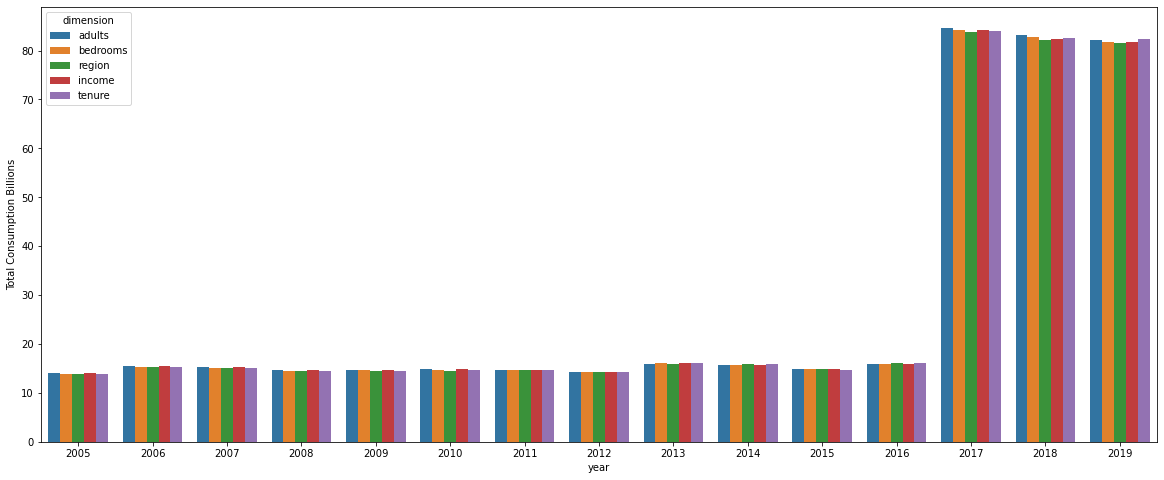

In [15]:
plt.figure(figsize=(20, 8))

ax = sns.barplot(x = 'year',y = 'consumption_totals',data = melt_elec, hue = 'dimension')
scale_y = 1e9
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Total Consumption Billions")

#### England & Wales - Gas Totals

In [16]:
gas_totals = pd.DataFrame({'year':year,
'bedrooms':tot_bedrooms['gas_total_consumption'],
'bedrooms_sample_size':tot_bedrooms['gas_sample_size'],
'adults':tot_adults['gas_total_consumption'],
'adults_sample_size':tot_adults['gas_sample_size'],
'income':tot_income['gas_total_consumption'],
'income_sample_size':tot_income['gas_sample_size'],
'region':tot_region['gas_total_consumption'],
'region_sample_size':tot_region['gas_sample_size'],
'tenure':tot_tenure['gas_total_consumption'],
'tenure_sample_size':tot_tenure['gas_sample_size']})

In [17]:
melt_gas = pd.melt(gas_totals, id_vars=['year'], value_vars=['adults','bedrooms',
                                                               'region','income',
                                                              'tenure'],
                   var_name = 'dimension',value_name = 'consumption_totals')

Text(0, 0.5, 'Total Consumption Billions')

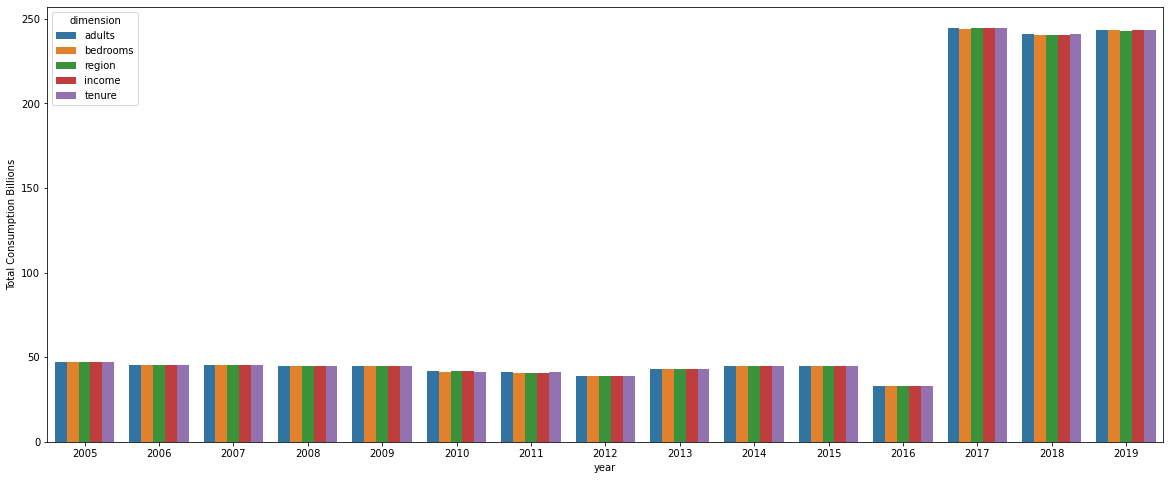

In [18]:
plt.figure(figsize=(20, 8))

ax = sns.barplot(x = 'year',y = 'consumption_totals',data = melt_gas, hue = 'dimension')
scale_y = 1e9
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Total Consumption Billions")

#### Scotland - Electricity 

In [19]:
elec_scot_totals = pd.DataFrame({'year':scot_year,
'bedrooms':tot_scot_bedrooms['elec_total_consumption'],
'bedrooms_sample_size':tot_scot_bedrooms['elec_sample_size'],
'adults':tot_scot_adults['elec_total_consumption'],
'adults_sample_size':tot_scot_adults['elec_sample_size'],
'income':tot_scot_income['elec_total_consumption'],
'income_sample_size':tot_scot_income['elec_sample_size'],
'tenure':tot_scot_tenure['elec_total_consumption'],
'tenure_sample_size':tot_scot_tenure['elec_sample_size']})

In [20]:
scot_elec = pd.melt(elec_scot_totals, id_vars=['year'], value_vars=['bedrooms','adults',
                                                               'income','tenure'],
                   var_name = 'dimension',value_name = 'consumption_totals')

Text(0, 0.5, 'Total Consumption Billions')

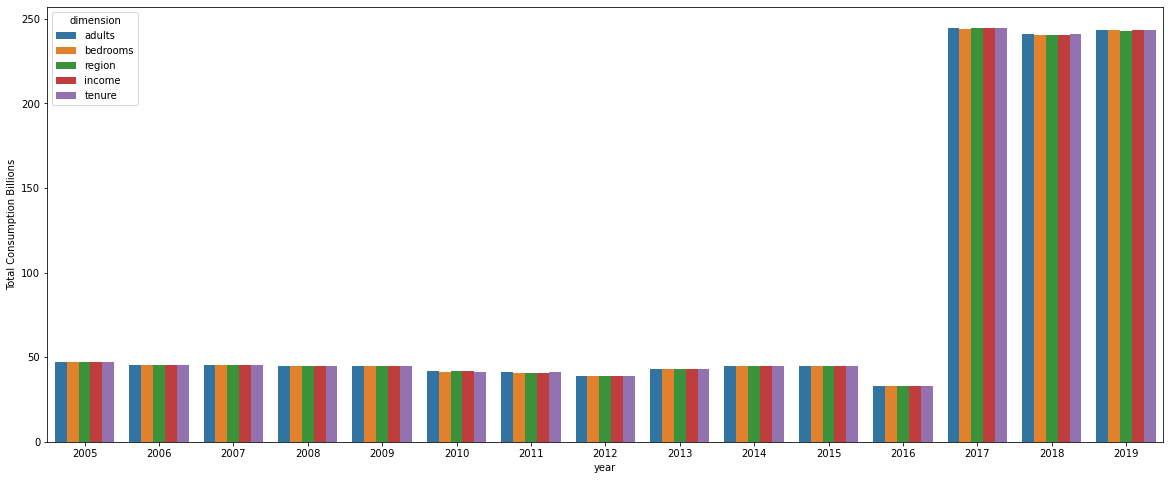

In [21]:
plt.figure(figsize=(20, 8))

ax = sns.barplot(x = 'year',y = 'consumption_totals',data = melt_gas, hue = 'dimension')
scale_y = 1e9
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Total Consumption Billions")

#### Scotland - Gas

In [22]:
tot_scot_income

,year,elec_sample_size,elec_total_consumption,gas_sample_size,gas_total_consumption
0,2011,2168730,9991120000,1597040,24632116000
1,2012,2146930,9669648000,1533190,23463036000
2,2013,2127210,9235759000,1492740,21890195000
3,2014,2124220,9297610000,1677220,24017581000
4,2015,2134870,9164193000,1690520,23645568000
5,2016,2135990,8753091000,1271560,17997111000
6,2017,2081240,8149526000,1554270,22239166000
7,2018,2079930,7850841000,1548160,21802564000
8,2019,2058610,7642813000,1541750,21984633000


In [23]:
gas_scot_totals = pd.DataFrame({'year':scot_year,
'bedrooms':tot_scot_bedrooms['gas_total_consumption'],
'bedrooms_sample_size':tot_scot_bedrooms['gas_sample_size'],
'adults':tot_scot_adults['gas_total_consumption'],
'adults_sample_size':tot_scot_adults['gas_sample_size'],
'income':tot_scot_income['gas_total_consumption'],
'income_sample_size':tot_scot_income['gas_sample_size'],
'tenure':tot_scot_tenure['gas_total_consumption'],
'tenure_sample_size':tot_scot_tenure['gas_sample_size']})

In [24]:
scot_gas = pd.melt(gas_scot_totals, id_vars=['year'], value_vars=['bedrooms','adults',
                                                               'income','tenure'],
                   var_name = 'dimension',value_name = 'consumption_totals')

Text(0, 0.5, 'Total Consumption Billions')

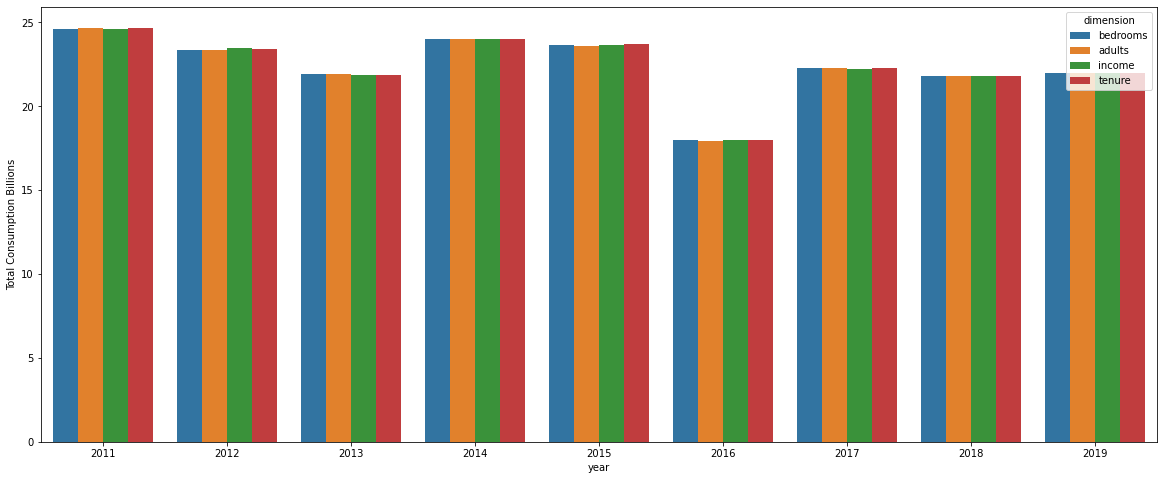

In [25]:
plt.figure(figsize=(20, 8))

ax = sns.barplot(x = 'year',y = 'consumption_totals',data = scot_gas, hue = 'dimension')
scale_y = 1e9
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Total Consumption Billions")

### Yearly Average Consumption

** Considering all factors, what is the average consumption for all households in each year

In [26]:
gas_totals.head()

,year,bedrooms,bedrooms_sample_size,adults,adults_sample_size,income,income_sample_size,region,region_sample_size,tenure,tenure_sample_size
0,2005,46973825000,2531820,47081489000,2536830,47153308000,2536850,46991971000,2531830,47067488000,2531820
1,2006,45539702000,2562770,45631303000,2568050,45665566000,2568060,45500781000,2562760,45516500000,2562760
2,2007,45453763000,2640280,45568903000,2648000,45508277000,2647990,45536775000,2640270,45421925000,2640270
3,2008,44660158000,2689450,44837449000,2704310,44878701000,2704330,44699317000,2689450,44586542000,2689450
4,2009,44730799000,2949030,44992525000,2966700,44922600000,2966710,44786192000,2949020,44713866000,2949010


In [27]:
def cal_average(df, cols1, cols2):
    joinedlist = cols1 + cols2
    
    if any("region" in s for s in list(df.columns)):
        
        df['total_consumption'] = df[cols1].max(axis = 1)
        df['sample_size'] = df[cols2].max(axis = 1)
        df['avg_consumption'] = df['total_consumption']/df['sample_size']
    else:
        matching_cols1 = [s for s in cols1 if "region" not in s]
        matching_cols2 = [s for s in cols2 if "region" not in s]
        
        df['total_consumption'] = df[matching_cols1].max(axis = 1)
        df['sample_size'] = df[matching_cols2].max(axis = 1)
        df['avg_consumption'] = df['total_consumption']/df['sample_size']
        
        
    return df

In [28]:
cols1 = ['bedrooms','adults','income','region','tenure']
cols2 = ['bedrooms_sample_size','adults_sample_size','income_sample_size','region_sample_size','tenure_sample_size']
dfs = [elec_totals, gas_totals,gas_scot_totals, elec_scot_totals]


In [29]:
for df in dfs: 
    df = cal_average(df, cols1, cols2)

In [30]:
elec_totals.rename(columns = {'avg_consumption':'avg_elec_consumption'}, inplace = True)
gas_totals.rename(columns = {'avg_consumption':'avg_gas_consumption'}, inplace = True)
gas_scot_totals.rename(columns = {'avg_consumption':'avg_scot_gas_consumption'}, inplace = True)
elec_scot_totals.rename(columns = {'avg_consumption':'avg_scot_elec_consumption'}, inplace = True)

In [31]:
def merge_averages(df1, df2):
    df3 = pd.merge(df1, df2, on = 'year', how = 'left')
    return df3
    

In [32]:
england = merge_averages(elec_totals, gas_totals[['year','avg_gas_consumption']])
scotland = merge_averages(elec_scot_totals, gas_scot_totals[['year','avg_scot_gas_consumption']])

### Weightings

In [33]:
eng_list = [eng_bedrooms,eng_adults,eng_income,eng_region,eng_tenure]
scot_list = [scot_bedrooms,scot_adults,scot_income,scot_tenure]

In [34]:
eng_bedrooms,eng_adults,eng_income,eng_region,eng_tenure = \
[merge_averages(df, england[['year','avg_elec_consumption','avg_gas_consumption']]) for df in eng_list]

In [35]:
scot_bedrooms,scot_adults,scot_income,scot_tenure = \
[merge_averages(df, scotland[['year','avg_scot_elec_consumption','avg_scot_gas_consumption']]) for df in scot_list]

In [36]:
eng_bedrooms.head()

,year,num_bedrooms,elec_sample_size,elec_mean_consumption,elec_median_consumption,gas_sample_size,gas_mean_consumption,gas_median_consumption,elec_total_consumption,gas_total_consumption,avg_elec_consumption,avg_gas_consumption
0,2005,1,278770,3400,2300.0,161490,10300,9400,947818000,1663347000,4649.168521,18587.345724
1,2006,1,315710,3300,2200.0,167360,9700,8800,1041843000,1623392000,4515.343232,17782.125807
2,2007,1,317910,3300,2200.0,171300,9400,8500,1049103000,1610220000,4466.307075,17208.800227
3,2008,1,320440,3200,2100.0,173020,9000,8000,1025408000,1557180000,4264.823924,16595.127444
4,2009,1,322050,3200,2100.0,198170,8100,7200,1030560000,1605177000,4225.405060,15165.798140


In [37]:
def eng_cal_weights(df):
    df['elec_weights'] = df['elec_mean_consumption']/df['avg_elec_consumption']
    df['gas_weights'] = df['gas_mean_consumption']/df['avg_gas_consumption']
    
    return df 

In [38]:
def scot_cal_weights(df):
    df['elec_weights'] = df['elec_mean_consumption']/df['avg_scot_elec_consumption']
    df['gas_weights'] = df['gas_mean_consumption']/df['avg_scot_gas_consumption']
    
    return df 

In [39]:
eng_list = [eng_bedrooms,eng_adults,eng_income,eng_region,eng_tenure]
scot_list = [scot_bedrooms,scot_adults,scot_income,scot_tenure]

In [40]:
scot_bedrooms,scot_adults,scot_income,scot_tenure = \
[scot_cal_weights(df) for df in scot_list]

In [41]:
eng_bedrooms,eng_adults,eng_income,eng_region,eng_tenure = \
[eng_cal_weights(df) for df in eng_list]

In [42]:
eng_bedrooms.head()

,year,num_bedrooms,elec_sample_size,elec_mean_consumption,elec_median_consumption,gas_sample_size,gas_mean_consumption,gas_median_consumption,elec_total_consumption,gas_total_consumption,avg_elec_consumption,avg_gas_consumption,elec_weights,gas_weights
0,2005,1,278770,3400,2300.0,161490,10300,9400,947818000,1663347000,4649.168521,18587.345724,0.731314,0.55414
1,2006,1,315710,3300,2200.0,167360,9700,8800,1041843000,1623392000,4515.343232,17782.125807,0.730841,0.545492
2,2007,1,317910,3300,2200.0,171300,9400,8500,1049103000,1610220000,4466.307075,17208.800227,0.738865,0.546232
3,2008,1,320440,3200,2100.0,173020,9000,8000,1025408000,1557180000,4264.823924,16595.127444,0.750324,0.542328
4,2009,1,322050,3200,2100.0,198170,8100,7200,1030560000,1605177000,4225.405060,15165.798140,0.757324,0.534097


#### Rename weight columns based on factors

In [43]:
eng_bedrooms.rename(columns = {'elec_weights':'bedrooms_elec_weights','gas_weights':'bedrooms_gas_weights'},\
                    inplace = True)
cols = ['year','num_bedrooms','avg_elec_consumption','avg_gas_consumption','bedrooms_elec_weights',\
        'bedrooms_gas_weights']
eng_bedrooms = eng_bedrooms[cols]

In [44]:
eng_adults.rename(columns = {'elec_weights':'adults_elec_weights','gas_weights':'adults_gas_weights'},\
                  inplace = True)
cols = ['year','num_adults','avg_elec_consumption','avg_gas_consumption','adults_elec_weights',\
        'adults_gas_weights']
eng_adults = eng_adults[cols]

In [45]:
eng_income.rename(columns = {'elec_weights':'income_elec_weights','gas_weights':'income_gas_weights'},\
                  inplace = True)
cols = ['year','income','avg_elec_consumption','avg_gas_consumption','income_elec_weights','income_gas_weights']
eng_income = eng_income[cols]

In [46]:
eng_region.rename(columns = {'elec_weights':'region_elec_weights','gas_weights':'region_gas_weights'},\
                  inplace = True)
cols = ['year','region','avg_elec_consumption','avg_gas_consumption','region_elec_weights','region_gas_weights']
eng_region = eng_region[cols]

In [47]:
eng_tenure.rename(columns = {'elec_weights':'tenure_elec_weights','gas_weights':'tenure_gas_weights'},\
                  inplace = True)
cols = ['year','tenure','avg_elec_consumption','avg_gas_consumption','tenure_elec_weights','tenure_gas_weights']
eng_tenure = eng_tenure[cols]

In [48]:
scot_bedrooms.rename(columns = {'elec_weights':'bedrooms_elec_weights','gas_weights':'bedrooms_gas_weights'},\
                     inplace = True)
cols = ['year','num_bedrooms','avg_scot_elec_consumption','avg_scot_gas_consumption',
        'bedrooms_elec_weights','bedrooms_gas_weights']
scot_bedrooms = scot_bedrooms[cols]

In [49]:
scot_adults.rename(columns = {'elec_weights':'adults_elec_weights','gas_weights':'adults_gas_weights'},\
                   inplace = True)
cols = ['year','num_adults','avg_scot_elec_consumption','avg_scot_gas_consumption',
        'adults_elec_weights','adults_gas_weights']
scot_adults = scot_adults[cols]

In [50]:
scot_income.rename(columns = {'elec_weights':'income_elec_weights','gas_weights':'income_gas_weights'},\
                   inplace = True)
cols = ['year','income','avg_scot_elec_consumption','avg_scot_gas_consumption','income_elec_weights',\
        'income_gas_weights']
scot_income = scot_income[cols]

In [51]:
scot_tenure.rename(columns = {'elec_weights':'tenure_elec_weights','gas_weights':'tenure_gas_weights'},\
                   inplace = True)
cols = ['year','tenure','avg_scot_elec_consumption','avg_scot_gas_consumption','tenure_elec_weights',\
        'tenure_gas_weights']
scot_tenure = scot_tenure[cols]

### Merge all weights

In [52]:
dfs = [eng_bedrooms,eng_adults,eng_income,eng_region,eng_tenure]
eng_df = reduce(lambda  left,right: pd.merge(left,right,on=['year','avg_elec_consumption','avg_gas_consumption'],
                                            how='left'), dfs)

In [53]:
eng_df.head()

,year,num_bedrooms,avg_elec_consumption,avg_gas_consumption,bedrooms_elec_weights,bedrooms_gas_weights,num_adults,adults_elec_weights,adults_gas_weights,income,income_elec_weights,income_gas_weights,region,region_elec_weights,region_gas_weights,tenure,tenure_elec_weights,tenure_gas_weights
0,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,owner_occupied,1.053952,1.081381
1,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,privately_rented,0.946406,0.855421
2,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,council_housing,0.860369,0.796241
3,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,unknown,0.924897,0.925361
4,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_west,0.967915,1.022201,owner_occupied,1.053952,1.081381


In [54]:
dfs = [scot_bedrooms,scot_adults,scot_income,scot_tenure]
scot_df = reduce(lambda  left,right: pd.merge(left,right,on=['year',
                                                             'avg_scot_elec_consumption','avg_scot_gas_consumption'],
                                            how='left'), dfs)

### Calculate the modelled consumption

In [55]:
eng_df.head()

,year,num_bedrooms,avg_elec_consumption,avg_gas_consumption,bedrooms_elec_weights,bedrooms_gas_weights,num_adults,adults_elec_weights,adults_gas_weights,income,income_elec_weights,income_gas_weights,region,region_elec_weights,region_gas_weights,tenure,tenure_elec_weights,tenure_gas_weights
0,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,owner_occupied,1.053952,1.081381
1,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,privately_rented,0.946406,0.855421
2,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,council_housing,0.860369,0.796241
3,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_east,0.83886,1.054481,unknown,0.924897,0.925361
4,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.83886,0.871561,less_than_15k,0.83886,0.871561,north_west,0.967915,1.022201,owner_occupied,1.053952,1.081381


In [56]:
eng_df['elec_weight'] = eng_df[['bedrooms_elec_weights','adults_elec_weights',\
                                'income_elec_weights','region_elec_weights','tenure_elec_weights']].product(axis = 1)

eng_df['gas_weight'] = eng_df[['bedrooms_gas_weights','adults_gas_weights',\
                               'income_gas_weights','region_gas_weights','tenure_gas_weights']].product(axis = 1)

In [57]:
eng_df

,year,num_bedrooms,avg_elec_consumption,avg_gas_consumption,bedrooms_elec_weights,bedrooms_gas_weights,num_adults,adults_elec_weights,adults_gas_weights,income,income_elec_weights,income_gas_weights,region,region_elec_weights,region_gas_weights,tenure,tenure_elec_weights,tenure_gas_weights,elec_weight,gas_weight
0,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.838860,0.871561,less_than_15k,0.838860,0.871561,north_east,0.83886,1.054481,owner_occupied,1.053952,1.081381,0.454980,0.479990
1,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.838860,0.871561,less_than_15k,0.838860,0.871561,north_east,0.83886,1.054481,privately_rented,0.946406,0.855421,0.408554,0.379694
2,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.838860,0.871561,less_than_15k,0.838860,0.871561,north_east,0.83886,1.054481,council_housing,0.860369,0.796241,0.371412,0.353426
3,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.838860,0.871561,less_than_15k,0.838860,0.871561,north_east,0.83886,1.054481,unknown,0.924897,0.925361,0.399268,0.410738
4,2005,1,4649.168521,18587.345724,0.731314,0.55414,1,0.838860,0.871561,less_than_15k,0.838860,0.871561,north_west,0.967915,1.022201,owner_occupied,1.053952,1.081381,0.524977,0.465297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261355,2019,unknown,3670.337736,13353.744909,0.0,0.0,unknown,0.871854,0.823739,unknown,0.844609,0.823739,wales,0.926345,0.943556,unknown,0.844609,0.823739,0.000000,0.000000
261356,2019,unknown,3670.337736,13353.744909,0.0,0.0,unknown,0.871854,0.823739,unknown,0.844609,0.823739,unknown,1.253291,1.070861,owner_occupied,1.035327,1.078349,0.000000,0.000000
261357,2019,unknown,3670.337736,13353.744909,0.0,0.0,unknown,0.871854,0.823739,unknown,0.844609,0.823739,unknown,1.253291,1.070861,privately_rented,1.008082,0.928578,0.000000,0.000000
261358,2019,unknown,3670.337736,13353.744909,0.0,0.0,unknown,0.871854,0.823739,unknown,0.844609,0.823739,unknown,1.253291,1.070861,council_housing,0.871854,0.741365,0.000000,0.000000


In [58]:
scot_df['elec_weight'] = eng_df[['bedrooms_elec_weights','adults_elec_weights',\
                                 'income_elec_weights','tenure_elec_weights']].product(axis = 1)

scot_df['gas_weight'] = eng_df[['bedrooms_gas_weights','adults_gas_weights','income_gas_weights',\
                                'tenure_gas_weights']].product(axis = 1)

In [59]:
eng_df['elec_mod_consumption'] = np.round(eng_df['avg_elec_consumption'] * eng_df['elec_weight'])
eng_df['gas_mod_consumption'] = np.round(eng_df['avg_gas_consumption'] * eng_df['gas_weight'])

scot_df['gas_mod_consumption'] = np.round(scot_df['avg_scot_gas_consumption'] * scot_df['gas_weight'])
scot_df['elec_mod_consumption'] = np.round(scot_df['avg_scot_elec_consumption'] * scot_df['elec_weight'])


In [60]:
scot_df['region'] = 'scotland'

In [61]:
scot_df.head()

,year,num_bedrooms,avg_scot_elec_consumption,avg_scot_gas_consumption,bedrooms_elec_weights,bedrooms_gas_weights,num_adults,adults_elec_weights,adults_gas_weights,income,income_elec_weights,income_gas_weights,tenure,tenure_elec_weights,tenure_gas_weights,elec_weight,gas_weight,gas_mod_consumption,elec_mod_consumption,region
0,2011,1,4752.633326,15461.291514,0.799557,0.653244,1,0.799557,0.821406,less_than_15k,0.820598,0.795535,owner_occupied,1.009966,1.099520,0.542379,0.455191,7038.0,2578.0,scotland
1,2011,1,4752.633326,15461.291514,0.799557,0.653244,1,0.799557,0.821406,less_than_15k,0.820598,0.795535,privately_rented,0.883721,0.763196,0.487034,0.360077,5567.0,2315.0,scotland
2,2011,1,4752.633326,15461.291514,0.799557,0.653244,1,0.799557,0.821406,less_than_15k,0.820598,0.795535,council_housing,0.862680,0.769664,0.442759,0.335166,5182.0,2104.0,scotland
3,2011,1,4752.633326,15461.291514,0.799557,0.653244,1,0.799557,0.821406,less_than_15k,0.820598,0.795535,unknown,1.641195,1.300021,0.475965,0.389517,6022.0,2262.0,scotland
4,2011,1,4752.633326,15461.291514,0.799557,0.653244,1,0.799557,0.821406,15k_19k,0.883721,0.834342,owner_occupied,1.009966,1.099520,0.542379,0.455191,7038.0,2578.0,scotland


In [62]:
eng_df = eng_df[eng_df['year'] > 2010]

In [63]:
eng_df = eng_df[~eng_df.isin(['unknown']).any(axis=1)]

In [64]:
scot_df = scot_df[~scot_df.isin(['unknown']).any(axis=1)]

In [65]:
merge_df = pd.concat([eng_df,scot_df], axis = 0)

In [66]:
merge_df = merge_df[~merge_df.isin(['unknown']).any(axis=1)]

In [67]:
merge_df['elec_mod_consumption'].describe()

count    74250.000000
mean      5226.552848
std       2433.159121
min       1195.000000
25%       3494.000000
50%       4637.000000
75%       6353.000000
max      21636.000000
Name: elec_mod_consumption, dtype: float64

In [68]:
merge_df['gas_mod_consumption'].describe()

count    74250.000000
mean     16385.525980
std       9546.413597
min       2805.000000
25%       9137.000000
50%      14008.000000
75%      21245.750000
max      75620.000000
Name: gas_mod_consumption, dtype: float64

#### Validation - Weights

In [69]:
merge_df.head()

,year,num_bedrooms,avg_elec_consumption,avg_gas_consumption,bedrooms_elec_weights,bedrooms_gas_weights,num_adults,adults_elec_weights,adults_gas_weights,income,...,region_gas_weights,tenure,tenure_elec_weights,tenure_gas_weights,elec_weight,gas_weight,elec_mod_consumption,gas_mod_consumption,avg_scot_elec_consumption,avg_scot_gas_consumption
17424,2011,1,4177.338627,14095.099374,0.742099,0.5321,1,0.789977,0.844265,less_than_15k,...,1.014537,owner_occupied,1.053302,1.092578,0.433123,0.416875,1809.0,5876.0,NaN,NaN
17425,2011,1,4177.338627,14095.099374,0.742099,0.5321,1,0.789977,0.844265,less_than_15k,...,1.014537,privately_rented,0.933609,0.837170,0.383905,0.319424,1604.0,4502.0,NaN,NaN
17426,2011,1,4177.338627,14095.099374,0.742099,0.5321,1,0.789977,0.844265,less_than_15k,...,1.014537,council_housing,0.837854,0.773318,0.344530,0.295061,1439.0,4159.0,NaN,NaN
17428,2011,1,4177.338627,14095.099374,0.742099,0.5321,1,0.789977,0.844265,less_than_15k,...,1.000348,owner_occupied,1.053302,1.092578,0.481248,0.411045,2010.0,5794.0,NaN,NaN
17429,2011,1,4177.338627,14095.099374,0.742099,0.5321,1,0.789977,0.844265,less_than_15k,...,1.000348,privately_rented,0.933609,0.837170,0.426561,0.314957,1782.0,4439.0,NaN,NaN


In [70]:
merge_df.groupby(['num_bedrooms']).bedrooms_elec_weights.agg(['mean','median','min', 'max']).reset_index()

,num_bedrooms,mean,median,min,max
0,1,0.750560,0.750148,0.720661,0.814911
1,2,0.883560,0.890147,0.841639,0.901066
2,3,1.003124,0.998478,0.988925,1.053490
3,4,1.249632,1.253291,1.150654,1.268750
4,5_or_more,1.682483,1.699372,1.325581,1.815572


In [71]:
merge_df.groupby(['num_adults']).adults_elec_weights.agg(['mean','median','min', 'max']).reset_index()

,num_adults,mean,median,min,max
0,1,0.811791,0.800158,0.788398,0.859837
1,2,1.023276,1.023675,0.967884,1.065156
2,3,1.174381,1.175231,1.128944,1.198800
3,4,1.300841,1.312403,1.234769,1.335027
4,5_or_more,1.425625,1.429630,1.331613,1.466172


In [72]:
inc = ['less_than_15k','15k_19k','20k_29k','30k_39k','40k_49k','50k_59K','60k_69k','70k_99k','100k_149k','more_than_150k']
merge_df.groupby(['income']).income_elec_weights.agg(['mean','median','min', 'max']).reindex(inc)

,mean,median,min,max
income,,,,
less_than_15k,0.796840,0.813915,0.735627,0.854525
15k_19k,0.868470,0.869763,0.825496,0.894633
20k_29k,0.913712,0.918682,0.883721,0.935705
30k_39k,0.986712,0.992513,0.963451,1.027152
40k_49k,1.052128,1.050207,1.023675,1.078148
50k_59K,1.100862,1.100217,1.073089,1.125118
60k_69k,1.140771,1.137759,1.107233,1.172996
70k_99k,1.232615,1.234589,1.172365,1.253291
100k_149k,1.435718,1.441322,1.283499,1.525745


In [73]:
ten = ['council_housing','privately_rented','owner_occupied']
merge_df.groupby(['tenure']).tenure_elec_weights.agg(['mean','median','min', 'max']).reindex(ten)

,mean,median,min,max
tenure,,,,
council_housing,0.863494,0.866186,0.825496,0.894633
privately_rented,0.964837,0.968305,0.882820,1.008082
owner_occupied,1.038454,1.040928,0.998681,1.065291


In [82]:
reg = ['london','north_east','west_midlands','yorks_humber','wales','north_west',
      'east_midlands','south_east','south_west','east_england']
eng_df.groupby(['region']).region_elec_weights.agg(['mean','median','min', 'max']).reindex(reg)

,mean,median,min,max
region,,,,
london,0.986776,0.981486,0.969165,1.016720
north_east,0.851818,0.847267,0.836199,0.875172
west_midlands,0.995421,0.997427,0.980836,1.005425
yorks_humber,0.919538,0.919890,0.890127,0.933609
wales,0.944698,0.944314,0.926345,0.957547
north_west,0.947725,0.944930,0.940992,0.957547
east_midlands,0.973087,0.971178,0.966424,0.981486
south_east,1.059988,1.062573,1.042720,1.077241
south_west,1.065592,1.068153,1.049923,1.077241


#### Validation - Consumption

In [76]:
merge_df.groupby(['num_bedrooms']).elec_mod_consumption.agg(['mean','median','min', 'max']).reset_index()

,num_bedrooms,mean,median,min,max
0,1,3581.561279,3414.0,1195.0,8943.0
1,2,4184.359461,3948.0,1417.0,10385.0
2,3,4706.022761,4459.0,1638.0,11828.0
3,4,5829.240741,5534.0,1734.0,15001.0
4,5_or_more,7831.580000,7461.0,1660.0,21636.0


In [78]:
merge_df.groupby(['num_adults']).elec_mod_consumption.agg(['mean','median','min', 'max']).reset_index()

,num_adults,mean,median,min,max
0,1,3793.777306,3435.0,1195.0,11900.0
1,2,4692.229697,4237.0,1514.0,15145.0
2,3,5338.220808,4761.0,1753.0,17309.0
3,4,5880.224579,5249.0,1953.0,19112.0
4,5_or_more,6428.311852,5741.0,2112.0,21636.0


In [85]:
merge_df.groupby(['region']).elec_mod_consumption.agg(['mean','median','min', 'max']).reset_index()

,region,mean,median,min,max
0,east_england,5842.705630,5241.0,1504.0,21636.0
1,east_midlands,5333.885333,4778.5,1388.0,19669.0
2,london,5410.252000,4845.5,1388.0,20652.0
3,north_east,4670.389333,4180.5,1195.0,17210.0
4,north_west,5195.070519,4652.0,1350.0,19177.0
5,scotland,3708.902222,3592.0,1660.0,7389.0
6,south_east,5812.064296,5209.0,1504.0,21636.0
7,south_west,5841.642667,5235.0,1504.0,21636.0
8,wales,5178.897481,4640.5,1311.0,19177.0
9,west_midlands,5456.540889,4890.0,1388.0,20161.0


In [84]:
merge_df.groupby(['num_bedrooms','num_adults']).elec_mod_consumption.median().unstack()

num_adults,1,2,3,4,5_or_more
num_bedrooms,,,,,
1,2449.0,3069.5,3475.0,3790.0,4126.0
2,2877.0,3562.0,4030.0,4447.0,4864.5
3,3214.5,3993.0,4538.0,5023.0,5522.0
4,4022.0,4973.0,5643.0,6245.0,6868.0
5_or_more,5354.5,6687.0,7678.0,8511.0,9327.0


In [75]:
cols = ['year','num_bedrooms','num_adults','income','region','tenure','elec_mod_consumption','gas_mod_consumption']
df = merge_df[cols]
df[df['elec_mod_consumption'] > 10000]

,year,num_bedrooms,num_adults,income,region,tenure,elec_mod_consumption,gas_mod_consumption
69144,2013,2,5_or_more,more_than_150k,east_england,owner_occupied,10094.0,28114.0
69152,2013,2,5_or_more,more_than_150k,south_east,owner_occupied,10094.0,28528.0
69156,2013,2,5_or_more,more_than_150k,south_west,owner_occupied,10094.0,24807.0
72048,2014,2,5_or_more,more_than_150k,east_england,owner_occupied,10385.0,27241.0
72056,2014,2,5_or_more,more_than_150k,south_east,owner_occupied,10385.0,27654.0
...,...,...,...,...,...,...,...,...
217261,2019,5_or_more,5_or_more,more_than_150k,south_west,privately_rented,19116.0,54570.0
217262,2019,5_or_more,5_or_more,more_than_150k,south_west,council_housing,16533.0,43568.0
217264,2019,5_or_more,5_or_more,more_than_150k,wales,owner_occupied,17115.0,67099.0
217265,2019,5_or_more,5_or_more,more_than_150k,wales,privately_rented,16665.0,57780.0
